# 目录：


#### 1.导入评论数据

#### 2.导入弹幕数据

#### 3.利用电影评论与评分构造分类器

#### 4.使用该分类器对评论进行分类

#### 5.汇总评分、合并行、合并视频数据 

#### 6.情感分数与播放量的可视化

#### 7.线性回归

# 1.导入评论数据

In [1]:
from pyspark.sql import Row
import datetime
datetimeformat = " '%Y-%m-%d %H:%M:%S'"
# datetime.datetime.strptime(string_date, dateformat)
sc = spark.sparkContext

# Load a text file and convert each line to a Row.
lines = sc.textFile("bilireply.txt")
parts = lines.map(lambda l: l.split(","))
# reply = parts.map(lambda p: Row(url,video_code,page,rpid,oid,mid,parent,root,co_unt,rcount,floor,ctime,love,uname,sex,sign,rank,current_level,mess_age,plat,device,crawl_time)))
# reply = parts.map(lambda p: Row(url=p[0],video_code=int(p[1]),page=p[2],rpid=p[3],oid=p[4],mid=p[5],parent=p[6],root=p[7],co_unt=p[8],rcount=p[9],floor=p[10],ctime=datetime.datetime.strptime((p[11]),datetimeformat),love=int(p[12]),uname=p[13],sex=p[14],sign=p[15],rank=p[16],current_level=p[17],mess_age=p[18],plat=p[19],device=p[20],crawl_time=p[21]))
reply = parts.map(lambda p: Row(url=p[0],video_code=int(p[1]),page=p[2],rpid=p[3],oid=p[4],mid=p[5],parent=p[6],root=p[7],co_unt=p[8],rcount=p[9],floor=p[10],ctime=str(p[11])[2:-1],love=int(p[12]),uname=p[13],sex=p[14],sign=p[15],rank=p[16],current_level=p[17],mess_age=str(p[18])[2:-1],plat=p[19],device=p[20],crawl_time=p[21]))
# ((url,int(video_code),page,rpid,oid,mid,parent,root,co_unt,rcount,floor,ctime,love,uname,sex,sign,rank,current_level,mess_age,plat,device,crawl_time))
df = spark.createDataFrame(reply)
df.createOrReplaceTempView("reply")
ReplyDF = spark.sql("select video_code,mess_age,ctime from reply order by video_code")
print(ReplyDF)
ReplyDF.take(3)

DataFrame[video_code: bigint, mess_age: string, ctime: string]


[Row(video_code=14245610, mess_age='第一次前排激动\\\\≧▽≦/', ctime='2017-09-08 18:36:47'),
 Row(video_code=14245612, mess_age='视频不一样，但是音乐重了。。。\\nav9555758', ctime='2017-09-07 15:36:24'),
 Row(video_code=14245614, mess_age='第三（￣▽￣）', ctime='2017-09-09 22:33:57')]

In [2]:
ReplyDF.show()

+----------+--------------------+-------------------+
|video_code|            mess_age|              ctime|
+----------+--------------------+-------------------+
|  14245610|       第一次前排激动\\≧▽≦/|2017-09-08 18:36:47|
|  14245612|视频不一样，但是音乐重了。。。\n...|2017-09-07 15:36:24|
|  14245614|     up可以的，加油！������|2017-09-07 20:07:52|
|  14245614|                我第一喵|2017-09-07 17:46:28|
|  14245614|             第三（￣▽￣）|2017-09-09 22:33:57|
|  14245615|     打这些没人看的呀，还不如活动图|2017-09-07 18:33:00|
|  14245615|                 ？？？|2017-09-07 18:18:32|
|  14245615|自己穿护盾衣，基友轻音，关键是一定...|2017-09-07 20:52:16|
|  14245619|           大家怎么知道行程的|2017-09-09 20:41:20|
|  14245619|         哥哥私底下很爱穿衬衫啊|2017-09-09 23:24:22|
|  14245619|              弟弟真的高。|2017-09-08 03:13:54|
|  14245619|一黑一白可以可以可以很配�����...|2017-09-09 02:20:51|
|  14245619|             啊啊啊，都在啊|2017-09-09 13:23:13|
|  14245620|        穷人表示我就用的起820|2017-09-09 12:18:52|
|  14245620|              惨案现场……|2017-09-07 19:12:15|
|  14245624|               减

In [3]:
ReplyDF.toPandas().head()      #ReplyDF  videoDF  DanmuDF   rateDocument
# videoDF.printSchema()
# df.describe(['baths', 'beds','price','sqft']).show()  #df is dataframe, pandaDa or RDD ?
# ReplyDF.toDF().describe().show() 
# rateDocument.toDF().toPandas().describe('_1')

,video_code,mess_age,ctime
0,14245610,第一次前排激动\\≧▽≦/,2017-09-08 18:36:47
1,14245612,视频不一样，但是音乐重了。。。\nav9555758,2017-09-07 15:36:24
2,14245614,第三（￣▽￣）,2017-09-09 22:33:57
3,14245614,up可以的，加油！������,2017-09-07 20:07:52
4,14245614,我第一喵,2017-09-07 17:46:28


In [4]:
# schemaVideo.printSchema()

# 2.导入弹幕数据

In [5]:
# Load a text file and convert each line to a Row.
lines = sc.textFile("bilidanmu.txt")
parts = lines.map(lambda l: l.split(","))
danmu = parts.filter(lambda line : len(line)==14).map(lambda p: Row(video_url=p[0],video_code=int(p[1]),cid=p[2],posit=p[3],mess_age=str(p[4])[2:-1],ctime=str(p[5])[2:-1],other_index_1=p[6],other_index_2=p[7],other_index_3=p[8],other_index_4=p[9],other_index_5=p[10],other_index_6=p[11],other_index_7=p[12],crawl_time=p[13]))
# danmu_list.append((video_url,int(video_code),int(cid),float(posit),content,da_te,float(other_index_1),int(other_index_2),int(other_index_3),int(other_index_4),int(other_index_5),other_index_6,int(other_index_7),crawl_time))

danmudf = spark.createDataFrame(danmu)
danmudf.createOrReplaceTempView("danmu")
DanmuDF = spark.sql("select video_code,mess_age,ctime from danmu order by video_code")
print(DanmuDF)
DanmuDF.take(3)


DataFrame[video_code: bigint, mess_age: string, ctime: string]


[Row(video_code=14245605, mess_age='什么操作', ctime='2017-09-08 05:02'),
 Row(video_code=14245605, mess_age='锅救了你一命', ctime='2017-09-08 04:41'),
 Row(video_code=14245605, mess_age='好皮啊', ctime='2017-09-08 05:02')]

In [6]:
# rateDocument.toDF().toPandas().head()

# 3.利用电影评论与评分构造分类器

In [7]:
from pyspark.sql import Row
originData_1=sc.textFile('douban_movie_1.txt')
originData_2=sc.textFile('douban_movie_2.txt')
# originDistinctData_1=originData_1.distinct()
# originDistinctData_2=originData_2.distinct()
rateDocument_1=originData_1.map(lambda line : line.split('\t')).filter(lambda line : len(line)==2)#.map(lambda p: Row(rate=int(p[0]),mess_age=p[1]))
rateDocument_2=originData_2.map(lambda line : line.split('\t')).filter(lambda line : len(line)==2)#.map(lambda p: Row(rate=int(p[0]),mess_age=p[1]))
rateDocument = rateDocument_1.union(rateDocument_2)
rateDocument = rateDocument.filter(lambda line : int(line[0])<=5)
rateDocument.toDF().toPandas().head()

,_1,_2
0,5,在德国影院看的，字幕放完之后有彩蛋～先说两句题外话，算是引子吧。生活在德国看英语原声电影不容...
1,5,仿佛看了一部灵魂错位的死侍1.5，太特么欢乐了，小贱贱一直在被局长打脸，啪啪的，最后不得不承...
2,4,有幸参加由“死侍”RyanReynolds和塞缪尔杰克逊SamuelJackson主演下个月...
3,4,这是一部有爆炸有追车有枪战有肉搏镜头运用贼帅又有横跨欧洲美洲的异域风情的妹子加持嘴巴上还没把...
4,3,看评价说是很搞笑才看的。结果有点失望，笑点不多。但主题还是比较中肯，两个从外到内做事表达方式...


In [8]:
fiveRateDocument=rateDocument.filter(lambda line : int(line[0])==5)
print(fiveRateDocument.count())
fourRateDocument=rateDocument.filter(lambda line : int(line[0])==4)
print(fourRateDocument.count())
threeRateDocument=rateDocument.filter(lambda line : int(line[0])==3)
print(threeRateDocument.count())
twoRateDocument=rateDocument.filter(lambda line : int(line[0])==2)
print(twoRateDocument.count())
oneRateDocument=rateDocument.filter(lambda line : int(line[0])==1)
print(oneRateDocument.count())

246399
191247
87752
23943
14567


In [9]:
from pyspark.mllib.regression import LabeledPoint
def ReduceRate(a):
    if int(a) == 5 or int(a) == 4:
        return 1
    elif int(a) ==3:
        return 0
    else:
        return -1
# def ReduceRate(a):
#     if int(a) == 5 or int(a) == 4:
#         return 1
#     else:
#         return 0
negRateDocument=oneRateDocument.union(twoRateDocument).union(threeRateDocument)
# negRateDocument.repartition(1)
positiveRateDocument=fiveRateDocument.union(fourRateDocument)
# posRateDocument=sc.parallelize(positiveRateDocument.take(negRateDocument.count())) #.repartition(1)
posRateDocument=sc.parallelize(positiveRateDocument.take(threeRateDocument.count())) #.repartition(1)
allRateDocument=negRateDocument.union(posRateDocument)
# allRateDocument.repartition(1)
rate=allRateDocument.map(lambda s : ReduceRate(s[0]))
document=allRateDocument.map(lambda s: s[1])

#using Bayes Model
# pip install jieba; conda install -c conda-forge jieba
import jieba
words=document.map(lambda w:"/".\
    join(jieba.cut_for_search(w))).\
    map(lambda line: line.split("/"))
print(words)
from pyspark.mllib.feature import HashingTF, IDF
hashingTF = HashingTF()
tf = hashingTF.transform(words)
tf.cache()
# 计算 TF-IDF 矩阵
idfModel = IDF().fit(tf)
tfidf = idfModel.transform(tf)
zipped=rate.zip(tfidf)
data=zipped.map(lambda line:LabeledPoint(line[0],line[1]))
training, test = data.randomSplit([0.6, 0.4], seed = 0)
from pyspark.mllib.classification import NaiveBayes
# NBmodel = NaiveBayes.train(training, 1.0)

NBmodel = NaiveBayes.train(training, 1.0)
predictionAndLabel = test.map(lambda p : (NBmodel.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda x: 1.0 \
    if x[0] == x[1] else 0.0).count() / test.count()
# def Chinese_sen_classifier(yourDocument):
#     yourwords="/".join(jieba.cut_for_search(yourDocument)).split("/")
#     yourtf = hashingTF.transform(yourwords)
#     yourtfidf=idfModel.transform(yourtf)
#     return (int(NBmodel.predict(yourtfidf)),'1')

def Chinese_sen_classifier(yourDocument):
    yourwords="/".join(jieba.cut_for_search(yourDocument)).split("/")
    yourtf = hashingTF.transform(yourwords)
    yourtfidf=idfModel.transform(yourtf)
    return int(NBmodel.predict(yourtfidf))

PythonRDD[68] at RDD at PythonRDD.scala:48


In [180]:
# a= ["'好好听啊������指法好简单的样子，福音啊'","'第一次前排激动\\≧▽≦/'","恶心'"]
# print(accuracy)
print(Chinese_sen_classifier("这么丑的吗，恶心'")) #0:neutral -1:negative 1:positive
print(Chinese_sen_classifier("'第一次前排激动\\≧▽≦/'"))
print(Chinese_sen_classifier('福音啊'))

-1
0
1


In [175]:

# ###using SVM
def ReduceRate(a):
    if int(a) == 5 or int(a) == 4:
        return 1
    else:
        return 0
negRateDocument=oneRateDocument.union(twoRateDocument).union(threeRateDocument)
negRateDocument.repartition(1)
positiveRateDocument=fiveRateDocument.union(fourRateDocument)
# posRateDocument=sc.parallelize(positiveRateDocument.take(negRateDocument.count())) #.repartition(1)
posRateDocument=sc.parallelize(positiveRateDocument.take(threeRateDocument.count())).repartition(1)
allRateDocument=negRateDocument.union(posRateDocument)
allRateDocument.repartition(1)
rate=allRateDocument.map(lambda s : ReduceRate(s[0]))
document=allRateDocument.map(lambda s: s[1])
import jieba
words=document.map(lambda w:"/".\
    join(jieba.cut_for_search(w))).\
    map(lambda line: line.split("/"))
print(words)
from pyspark.mllib.feature import HashingTF, IDF
hashingTF = HashingTF()
tf = hashingTF.transform(words)
tf.cache()
# 计算 TF-IDF 矩阵
idfModel = IDF().fit(tf)
tfidf = idfModel.transform(tf)
zipped=rate.zip(tfidf)
data=zipped.map(lambda line:LabeledPoint(line[0],line[1]))
training, test = data.randomSplit([0.6, 0.4], seed = 0)


from pyspark.mllib.classification import SVMWithSGD, SVMModel
SVMmodel = SVMWithSGD.train(training, iterations=100)   #Classification labels should be 0 or 1. Found 23159 invalid labels
predictionAndLabel = test.map(lambda p : (SVMmodel.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda x: 1.0 if x[0] == x[1] else 0.0).count() / test.count()
print('SVM classifier prediction accuracy is '+str(accuracy))


def SVMChinese_sen_classifier(yourDocument):
    yourwords="/".join(jieba.cut_for_search(yourDocument)).split("/")
    yourtf = hashingTF.transform(yourwords)
    yourtfidf=idfModel.transform(yourtf)
    return int(SVMmodel.predict(yourtfidf))

In [178]:
print(SVMChinese_sen_classifier("这么丑的吗，恶心'"))     #SVM model：0-negative;1-Positive
print(SVMChinese_sen_classifier("'第一次前排激动\\≧▽≦/'"))
print(SVMChinese_sen_classifier('福音啊'))

0
1
1


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\l\AppData\Local\Temp\jieba.cache


0.6752992714409539


Loading model cost 4.351 seconds.
Prefix dict has been built succesfully.


0
0
1


# 4.使用该分类器对评论进行分类

In [11]:
#将弹幕数据与评论数据合并
MsgDF = ReplyDF.union(DanmuDF).orderBy("video_code")
MsgDF.toPandas().head()
# MsgDF.describe('ctime').show()

,video_code,mess_age,ctime
0,14245605,锅救了你一命,2017-09-08 04:41
1,14245605,什么操作,2017-09-08 05:02
2,14245605,好皮啊,2017-09-08 05:02
3,14245605,相信我你开了弹幕～,2017-09-09 04:16
4,14245605,我以为我qq响了,2017-09-09 12:25


In [12]:
# classificated = ReplyDF.rdd.map(lambda s : Chinese_sen_classifier(s[1]))#not work; cannot work spark on a spark


messageList = MsgDF.select("mess_age").rdd.flatMap(lambda x: x).collect()
scoreList = []
for i in range(len(messageList)):
    scoreList.append(Chinese_sen_classifier(messageList[i]))
# scoreList[0:100
# print(type(messageList))
# print(len(messageList))
# print(messageList[1])
# print(len(scoreList))
# print(messageList[0])
# print(type(scoreList))

In [13]:
scoreL = []
video_codeList = MsgDF.select("video_code").rdd.flatMap(lambda x: x).collect()
for i in range(len(scoreList)):
    scoreL.append((video_codeList[i],scoreList[i]))
scoreDF = spark.createDataFrame(scoreL,['video_code','score'])
scoreDF.show()
scoreDF.describe('score').show()

+----------+-----+
|video_code|score|
+----------+-----+
|  14245605|   -1|
|  14245605|    0|
|  14245605|    0|
|  14245605|    0|
|  14245605|   -1|
|  14245605|   -1|
|  14245605|   -1|
|  14245605|    0|
|  14245605|    1|
|  14245605|    1|
|  14245605|   -1|
|  14245605|   -1|
|  14245605|   -1|
|  14245605|    1|
|  14245605|    1|
|  14245605|   -1|
|  14245605|    1|
|  14245605|    0|
|  14245605|    0|
|  14245605|    0|
+----------+-----+
only showing top 20 rows

+-------+-------------------+
|summary|              score|
+-------+-------------------+
|  count|              60577|
|   mean|-0.1614474140350298|
| stddev| 0.8361255810982599|
|    min|                 -1|
|    max|                  1|
+-------+-------------------+



# 5.汇总评分、合并行、合并视频数据 

In [14]:
# # scoreDF = spark.createDataFrame(scoreList,['score']) #not work, 1.cannot convert a normal list[1,2] instead:[(1,1),(2,2)] 2.change into int instead of float   
# # scoreDF = spark.createDataFrame(scoreList,['score','a'])
#导入视频数据、获得列表
from pyspark.sql import Row

sc = spark.sparkContext
# Load a text file and convert each line to a Row.
lines = sc.textFile("bilivideo.log")
parts = lines.map(lambda l: l.split(","))

video= parts.map(lambda p: Row(video_url=p[0], video_code=int(p[1]), publish_time=str(p[2])[2:-1], category1=p[3], category2=p[4], video_uploader=p[5],
                              uploader_id=p[6], uploader_upload_videos=p[7], up_sex=p[8], up_birth=p[9], up_fans=p[10],
                              up_friend=p[11], up_attention=p[12], up_level=p[13], up_plate=p[14], up_pla_level=p[15],up_pla_condition=[16],
                              view=int(p[17]),danmaku=int(p[18]),reply=p[19],favorite=int(p[20]),coin=int(p[21]),share=p[22],now_rank=p[23],his_rank=p[24],like_num=p[25],crawl_time=p[26]))
schemaVideo = spark.createDataFrame(video)
schemaVideo.createOrReplaceTempView("video")


In [15]:
#在此增加分析的维度
videoDF = spark.sql("SELECT video_code,view,favorite,coin,publish_time,category1 FROM video order by video_code")
# videoDF = spark.sql("SELECT video_code,view,favorite,coin,publish_time,category1 FROM video order by video_code")
videoDF.take(2)


[Row(video_code=14245605, view=88249, favorite=446, coin=273, publish_time='2017-09-07 15:37', category1=" '游戏'"),
 Row(video_code=14245606, view=2145, favorite=372, coin=200, publish_time='2017-09-07 15:27', category1=" '娱乐'")]

In [16]:
import pyspark.sql.functions as F
# ReplyDF.agg(F.approx_count_distinct(df.video_code)).collect()
#avg
# scoreDF.groupBy().avg().collect()
# sorted(scoreDF.groupBy('video_code').agg({'score': 'mean'}).orderBy("video_code").collect())
# sorted(scoreDF.groupBy(scoreDF.video_code).avg().collect())
# sorted(scoreDF.groupBy(['video_code', scoreDF.score]).count().collect())
#sum
# sorted(scoreDF.groupBy('video_code').agg({'score': 'sum'}).orderBy("video_code").collect())
# sorted(scoreDF.groupBy('video_code').agg({'score': 'mean'}).orderBy("video_code").collect())
avgDF=scoreDF.groupBy('video_code').agg({'score': 'mean'}).orderBy("video_code")
sumDF=scoreDF.groupBy('video_code').agg({'score': 'sum'}).orderBy("video_code")
#variance
varDF=scoreDF.groupBy('video_code').agg(F.variance(scoreDF.score))

view_scoreDF = avgDF.join(videoDF, on='video_code').join(sumDF, on='video_code').join(varDF, on='video_code')
view_scoreDF = view_scoreDF.rdd.map(lambda line: Row(video_code = line[0], avg_score = line[1], view=line[2], favorite=line[3],coin=line[4],publish_time=line[5],category=line[6],sum_score=line[7],var_score=line[8])).toDF()
view_scoreDF.show()

+--------------------+--------+----+--------+----------------+---------+-------------------+----------+-----+
|           avg_score|category|coin|favorite|    publish_time|sum_score|          var_score|video_code| view|
+--------------------+--------+----+--------+----------------+---------+-------------------+----------+-----+
|  0.4444444444444444|    '生活'|   4|      28|2017-09-07 15:33|        4| 0.7777777777777778|  14245770|  274|
|                 1.0|    '娱乐'|   1|       4|2017-09-07 15:50|        2|                0.0|  14246196|   51|
|               -0.75|    '游戏'|   1|      11|2017-09-07 16:15|       -9|0.20454545454545459|  14246788| 5425|
|-0.16923076923076924|    '生活'|  13|      29|2017-09-08 08:07|      -11| 0.6427884615384616|  14246933| 3700|
|-0.07692307692307693|    '音乐'|  10|     167|2017-09-07 16:30|       -1| 0.4102564102564103|  14247170| 4163|
|                -1.0|    '游戏'|   0|       0|2017-09-07 16:39|       -1|                NaN|  14247593| 1018|
|         

In [17]:
sumDF.show()

+----------+----------+
|video_code|sum(score)|
+----------+----------+
|  14245605|      -214|
|  14245606|         0|
|  14245610|         0|
|  14245612|        -1|
|  14245614|        -1|
|  14245615|        -3|
|  14245619|        -4|
|  14245620|        -6|
|  14245621|       -19|
|  14245622|        -3|
|  14245624|         2|
|  14245625|        -3|
|  14245626|       -19|
|  14245627|         9|
|  14245629|       -37|
|  14245630|       -11|
|  14245631|         1|
|  14245633|        -2|
|  14245635|        -5|
|  14245638|        -1|
+----------+----------+
only showing top 20 rows



# 6.情感分数与播放量的可视化

In [18]:
# conda install -c conda-forge matplotlib 
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pdf=view_scoreDF.toPandas()


In [127]:
# pdf.plot(kind='barh',x='view',y='avg_score',colormap='winter_r')
view_scoreDF.describe().show()

+-------+-------------------+--------+------------------+-----------------+----------------+------------------+---------+--------------------+------------------+
|summary|          avg_score|category|              coin|         favorite|    publish_time|         sum_score|var_score|          video_code|              view|
+-------+-------------------+--------+------------------+-----------------+----------------+------------------+---------+--------------------+------------------+
|  count|               1107|    1107|              1107|             1107|            1107|              1107|     1107|                1107|              1107|
|   mean|-0.1346175802833703|    null|40.928635953026195|84.18608852755195|            null|-8.688346883468835|      NaN|1.4246635139114724E7| 5174.675700090334|
| stddev|  0.514680482936535|    null|253.21659699353037|303.6232849359572|            null| 35.95111056031104|      NaN|   576.3936915705108|14609.688959900612|
|    min|               -1.0

In [20]:
# import pandas
pdf.fillna(0, inplace=True) #using inplace=True to actually change the contents of df.

In [21]:
pdf.head()
# df.describe(['baths', 'beds','price','sqft']).show()  #df is dataframe, pandaDa or RDD ?

,avg_score,category,coin,favorite,publish_time,sum_score,var_score,video_code,view
0,0.444444,'生活',4,28,2017-09-07 15:33,4,0.777778,14245770,274
1,1.000000,'娱乐',1,4,2017-09-07 15:50,2,0.000000,14246196,51
2,-0.750000,'游戏',1,11,2017-09-07 16:15,-9,0.204545,14246788,5425
3,-0.169231,'生活',13,29,2017-09-08 08:07,-11,0.642788,14246933,3700
4,-0.076923,'音乐',10,167,2017-09-07 16:30,-1,0.410256,14247170,4163


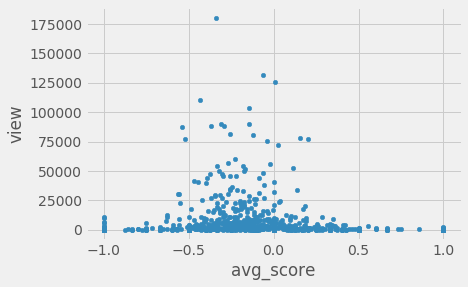

In [124]:
pdf.plot.scatter(x='avg_score', y='view')

In [23]:
# pdf1.plot.scatter(x='sum_score', y='view')
# plt.scatter(pdf['sum_score'],pdf['view'])
# plt.show()

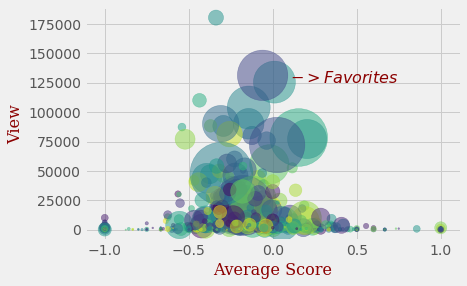

In [139]:
import numpy as np
colors = np.random.rand(int(pdf['video_code'].count()))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.text(0.1, 125000, r'$->Favorites$', fontdict=font)
plt.xlabel('Average Score', fontdict=font)
plt.ylabel('View', fontdict=font)
plt.scatter(x=pdf['avg_score'], y=pdf['view'], s=pdf['favorite'], c=colors, alpha=0.5)
plt.show()

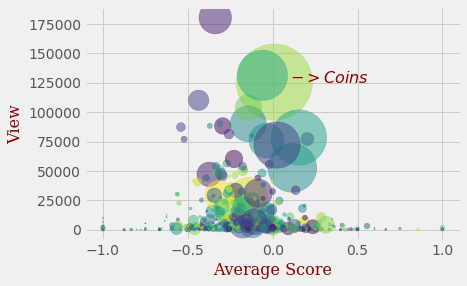

In [140]:
import numpy as np
colors = np.random.rand(int(pdf['video_code'].count()))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.text(0.1, 125000, r'$->Coins$', fontdict=font)
plt.xlabel('Average Score', fontdict=font)
plt.ylabel('View', fontdict=font)
plt.scatter(x=pdf['avg_score'], y=pdf['view'], s=pdf['coin'], c=colors, alpha=0.5)
plt.show()

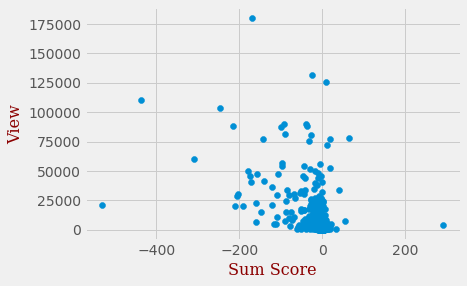

In [195]:
import numpy as np
colors = np.random.rand(int(pdf['video_code'].count()))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
# plt.text(0.1, 125000, r'$->Coins$', fontdict=font)
plt.xlabel('Sum Score', fontdict=font)
plt.ylabel('View', fontdict=font)
plt.scatter(x=pdf['sum_score'], y=pdf['view'])
plt.show()

# 7.线性回归

#### 自变量：情感评分的平均值、总和以及方差；因变量：播放量；

In [25]:
# # Labeled Points and Scaling Data
# # First Example with RDD
training = sqlContext.createDataFrame(pdf)['view','sum_score','avg_score','var_score']
# temp = training.rdd.map(lambda line:LabeledPoint(line[0],[line[1:]]))
# print(temp.take(5))

# from pyspark.mllib.util import MLUtils
# from pyspark.mllib.linalg import Vectors
# from pyspark.mllib.feature import StandardScaler
# features = training.rdd.map(lambda row: row[1:])
# print(features.take(5))
# standardizer = StandardScaler()
# model = standardizer.fit(features)
# features_transform = model.transform(features)
# features_transform.take(5)

In [26]:
# # Putting labels together with features
# lab = training.rdd.map(lambda row: row[0])
# print(lab.take(5))
# transformedData = lab.zip(features_transform)
# print(transformedData.take(5))
# transformedData = transformedData.map(lambda row: LabeledPoint(row[0],[row[1]]))
# transformedData.take(5)

In [27]:
# from pyspark.mllib.regression import LinearRegressionWithSGD
# trainingData, testingData = transformedData.randomSplit([.8,.2],seed=1234)
# linearModel = LinearRegressionWithSGD.train(trainingData,1000,.2)
# print(linearModel.weights)
# testingData.take(10)
# print("predict:")
# print(linearModel.predict([1.09161472531,2.61875531012,1.8069648352]))

# #transformedData would be our data for training

In [28]:
# # Checking the Model with Metrics
# from pyspark.mllib.evaluation import RegressionMetrics
# prediObserRDDin = trainingData.map(lambda row: (float(linearModel.predict(row.features[0])),row.label))
# metrics = RegressionMetrics(prediObserRDDin)
# print('metrics.r2 is'+metrics.r2)
# prediObserRDDout = testingData.map(lambda row: (float(linearModel.predict(row.features[0])),row.label))
# metrics = RegressionMetrics(prediObserRDDout)
# print('metrics.rootMeanSquaredError is'+metrics.rootMeanSquaredError)

In [29]:
from pyspark.sql.types import *
print(training)
training.take(5)
training.printSchema()
training = training.withColumn("avg_score", training["avg_score"].cast(FloatType())).withColumn("var_score", training["var_score"].cast(FloatType())) 
training.printSchema()
training.take(5)


###some usages below:
# df.groupBy("housingMedianAge").count().sort("housingMedianAge",ascending=False).show()
# df.describe().show()
# Import all from `sql.functions` 
# from pyspark.sql.functions import *
# # Adjust the values of `medianHouseValue`
# df = df.withColumn("medianHouseValue", col("medianHouseValue")/100000)
# # Show the first 2 lines of `df`
# df.take(2)


DataFrame[view: bigint, sum_score: bigint, avg_score: double, var_score: double]
root
 |-- view: long (nullable = true)
 |-- sum_score: long (nullable = true)
 |-- avg_score: double (nullable = true)
 |-- var_score: double (nullable = true)

root
 |-- view: long (nullable = true)
 |-- sum_score: long (nullable = true)
 |-- avg_score: float (nullable = true)
 |-- var_score: float (nullable = true)



[Row(view=274, sum_score=4, avg_score=0.4444444477558136, var_score=0.7777777910232544),
 Row(view=51, sum_score=2, avg_score=1.0, var_score=0.0),
 Row(view=5425, sum_score=-9, avg_score=-0.75, var_score=0.20454545319080353),
 Row(view=3700, sum_score=-11, avg_score=-0.16923077404499054, var_score=0.6427884697914124),
 Row(view=4163, sum_score=-1, avg_score=-0.07692307978868484, var_score=0.41025641560554504)]

In [119]:
# training.describe().show()
training.toPandas().describe()

,view,sum_score,avg_score,var_score
count,1107.00000,1107.000000,1107.000000,1107.000000
mean,5174.67570,-8.688347,-0.134618,0.547517
std,14609.68896,35.951111,0.514680,0.412828
min,1.00000,-531.000000,-1.000000,0.000000
25%,96.00000,-5.000000,-0.408893,0.180556
50%,481.00000,-1.000000,-0.142857,0.618421
75%,3079.50000,1.000000,0.056796,0.767775
max,180395.00000,292.000000,1.000000,2.000000


## Standardization

In [31]:
# transformedData.take(5)
# transformedDataDF = transformedData.toDF()
# transformedDataDF.show()
# training['view']
#The things above definitely don't work.

In [120]:
##Linear model fo DF

# Import `DenseVector`
from pyspark.ml.linalg import DenseVector

# Define the `input_data` 
input_data = training.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

# Replace `df` with the new DataFrame
trainingDataDF = spark.createDataFrame(input_data, ["label", "features"])
trainingDataDF.take(5)

[Row(label=274, features=DenseVector([4.0, 0.4444, 0.7778])),
 Row(label=51, features=DenseVector([2.0, 1.0, 0.0])),
 Row(label=5425, features=DenseVector([-9.0, -0.75, 0.2045])),
 Row(label=3700, features=DenseVector([-11.0, -0.1692, 0.6428])),
 Row(label=4163, features=DenseVector([-1.0, -0.0769, 0.4103]))]

In [121]:
# Import `StandardScaler` 
from pyspark.ml.feature import StandardScaler
# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
# Fit the DataFrame to the scaler
scaler = standardScaler.fit(trainingDataDF)
# Transform the data in `df` with the scaler
scaled_df = scaler.transform(trainingDataDF)
# Inspect the result
scaled_df.take(2)



[Row(label=274, features=DenseVector([4.0, 0.4444, 0.7778]), features_scaled=DenseVector([0.1113, 0.8635, 1.884])),
 Row(label=51, features=DenseVector([2.0, 1.0, 0.0]), features_scaled=DenseVector([0.0556, 1.943, 0.0]))]

## Linear Regression

In [122]:
# train_data.show()

+-----+--------------------+--------------------+
|label|            features|     features_scaled|
+-----+--------------------+--------------------+
|    7|[-2.0,-0.66666668...|[-0.0556311048206...|
|    7|     [-1.0,-1.0,0.0]|[-0.0278155524103...|
|    7|     [-1.0,-1.0,0.0]|[-0.0278155524103...|
|    9|     [-1.0,-1.0,0.0]|[-0.0278155524103...|
|    9|       [1.0,1.0,0.0]|[0.02781555241033...|
|   11|     [-1.0,-1.0,0.0]|[-0.0278155524103...|
|   11|     [-1.0,-1.0,0.0]|[-0.0278155524103...|
|   11|       [1.0,1.0,0.0]|[0.02781555241033...|
|   12|     [-1.0,-1.0,0.0]|[-0.0278155524103...|
|   12|     [-1.0,-1.0,0.0]|[-0.0278155524103...|
|   13|       [1.0,1.0,0.0]|[0.02781555241033...|
|   14|   [-3.0,-0.75,0.25]|[-0.0834466572309...|
|   14|       [1.0,1.0,0.0]|[0.02781555241033...|
|   15|     [-1.0,-1.0,0.0]|[-0.0278155524103...|
|   15|       [0.0,0.0,0.0]|       [0.0,0.0,0.0]|
|   15|       [1.0,1.0,0.0]|[0.02781555241033...|
|   16|       [0.0,0.0,1.0]|[0.0,0.0,2.422316...|


In [123]:
# Split the data into train and test sets
train_data, test_data = scaled_df.randomSplit([.8,.2],seed=1234)
# Import `LinearRegression`
from pyspark.ml.regression import LinearRegression
# Initialize `lr`
lr = LinearRegression(labelCol="label", maxIter=10, regParam=0.3, elasticNetParam=0.8)
# Fit the data to the model
linearModel = lr.fit(train_data)
# Generate predictions
predicted = linearModel.transform(test_data)
# Extract the predictions and the "known" correct labels
predictions = predicted.select("prediction").rdd.map(lambda x: x[0])
labels = predicted.select("label").rdd.map(lambda x: x[0])
# Zip `predictions` and `labels` into a list
predictionAndLabel = predictions.zip(labels).collect()
# Print out first 5 instances of `predictionAndLabel` 
predictionAndLabel[:5]

[(2673.5242452892494, 1),
 (5422.926425062389, 3),
 (4627.860521541157, 7),
 (2302.2298280974187, 13),
 (2492.055471791884, 25)]

In [142]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(linearModel.coefficients))
print("Intercept: %s" % str(linearModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = linearModel.summary
# print("T Values: " + str(trainingSummary.tValues))
# print("P Values: " + str(trainingSummary.pValues))
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


Coefficients: [-189.825643694,375.47285229,2152.78596022]
Intercept: 2487.877036693334
numIterations: 8
objectiveHistory: [0.5, 0.47880268484197724, 0.4205966376809585, 0.40125348591700083, 0.40119541674723086, 0.40110900652013975, 0.4011088188873444, 0.401108818823124]
+-------------------+
|          residuals|
+-------------------+
| -3327.808423220712|
|-2295.2298280974187|
|-2295.2298280974187|
|-2293.2298280974187|
|-2664.5242452892494|
|-2291.2298280974187|
|-2291.2298280974187|
|-2662.5242452892494|
|-2290.2298280974187|
|-2290.2298280974187|
|-2660.5242452892494|
|-3299.9458186134466|
|-2659.5242452892494|
|-2287.2298280974187|
| -2472.877036693334|
|-2658.5242452892494|
| -4624.662996911341|
|-2657.5242452892494|
|-3545.1807992530626|
| -2468.877036693334|
+-------------------+
only showing top 20 rows

RMSE: 13102.455782
r2: 0.197800


## GeneralizedLinearRegression

In [183]:
###for log (ln)  ##another standardization
from math import log
training = sqlContext.createDataFrame(pdf)['view','sum_score','avg_score','var_score']
training = training.rdd.map(lambda p: Row(view_ln=log(p[0]),sum_score=p[1],avg_score=p[2],var_score=p[3])).toDF()
# training.toPandas().head()
training.toPandas().describe()

,avg_score,sum_score,var_score,view_ln
count,1107.000000,1107.000000,1107.000000,1107.000000
mean,-0.134618,-8.688347,0.547517,6.302043
std,0.514680,35.951111,0.412828,2.274598
min,-1.000000,-531.000000,0.000000,0.000000
25%,-0.408893,-5.000000,0.180556,4.564294
50%,-0.142857,-1.000000,0.618421,6.175867
75%,0.056796,1.000000,0.767775,8.032510
max,1.000000,292.000000,2.000000,12.102904


In [169]:

from pyspark.ml.linalg import DenseVector

# Define the `input_data` 
input_data = training.rdd.map(lambda x: (x[3], DenseVector(x[0:3]))) ###avg_score  sum_score var_score

# Replace `df` with the new DataFrame
trainingDataDF = spark.createDataFrame(input_data, ["label", "features"])
trainingDataDF.take(5)

[Row(label=5.6131281063880705, features=DenseVector([0.4444, 4.0, 0.7778])),
 Row(label=3.9318256327243257, features=DenseVector([1.0, 2.0, 0.0])),
 Row(label=8.59877317840866, features=DenseVector([-0.75, -9.0, 0.2045])),
 Row(label=8.216088098632316, features=DenseVector([-0.1692, -11.0, 0.6428])),
 Row(label=8.333991247194975, features=DenseVector([-0.0769, -1.0, 0.4103]))]

In [170]:



# Import `StandardScaler` 
from pyspark.ml.feature import StandardScaler
# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
# Fit the DataFrame to the scaler
scaler = standardScaler.fit(trainingDataDF)
# Transform the data in `df` with the scaler
scaled_df = scaler.transform(trainingDataDF)
# Inspect the result
scaled_df.take(2)


[Row(label=5.6131281063880705, features=DenseVector([0.4444, 4.0, 0.7778]), features_scaled=DenseVector([0.8635, 0.1113, 1.884])),
 Row(label=3.9318256327243257, features=DenseVector([1.0, 2.0, 0.0]), features_scaled=DenseVector([1.943, 0.0556, 0.0]))]

In [171]:

from pyspark.ml.regression import GeneralizedLinearRegression

glr = GeneralizedLinearRegression(family="gaussian", link="identity", maxIter=10, regParam=0.3)
# Fit the model
model = glr.fit(scaled_df)##you can also do this by split the data and test the model later on

# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

# Summarize the model over the training set and print out some metrics
summary = model.summary
print("Coefficient Standard Errors: " + str(summary.coefficientStandardErrors))
print("T Values: " + str(summary.tValues))
print("P Values: " + str(summary.pValues))
print("Dispersion: " + str(summary.dispersion))
print("Null Deviance: " + str(summary.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(summary.residualDegreeOfFreedomNull))
print("Deviance: " + str(summary.deviance))
print("Residual Degree Of Freedom: " + str(summary.residualDegreeOfFreedom))
print("AIC: " + str(summary.aic))
print("Deviance Residuals: ")
summary.residuals().show()



Coefficients: [-0.0449766178789,-0.0198293073542,1.35225763949]
Intercept: 5.383321137739406
Coefficient Standard Errors: [0.11251292069346497, 0.0016049491945791495, 0.13959135687598284, 0.10024036040334551]
T Values: [-0.39974624782401275, -12.35509972599155, 9.687259080745406, 53.70412791891497]
P Values: [0.6894208203923367, 0.0, 0.0, 0.0]
Dispersion: 4.108811306707389
Null Deviance: 5722.216678863546
Residual Degree Of Freedom Null: 1106
Deviance: 4532.01887129825
Residual Degree Of Freedom: 1103
AIC: 4711.861748275083
Deviance Residuals: 
+--------------------+
|   devianceResiduals|
+--------------------+
|  -0.722642135814338|
| -1.3668602724277963|
|  2.7266576575403416|
|  1.7378175446642423|
|   2.372608697345399|
|  1.4774681341379532|
|   -2.29227868438109|
| -1.9614437939261835|
|   1.018157704706014|
|-0.22121033713754024|
|  0.9530535733950316|
|  0.4180570849728946|
|  -1.516301430248189|
|  1.9438139937914851|
|   2.946461348225853|
| -1.1913808274612059|
|  0.5022761

In [192]:
# summaDF = spark.createDataFrame(summary.residualDegreeOfFreedom)
# training = sqlContext.createDataFrame(pdf)['view','sum_score','avg_score','var_score']
# training = training.rdd.map(lambda p: Row(view_ln=log(p[0]),sum_score=p[1],avg_score=p[2],var_score=p[3]))
training.show()    #everytime it Row,it changes and reverse the rows

+--------------------+---------+-------------------+------------------+
|           avg_score|sum_score|          var_score|           view_ln|
+--------------------+---------+-------------------+------------------+
|  0.4444444444444444|        4| 0.7777777777777778|5.6131281063880705|
|                 1.0|        2|                0.0|3.9318256327243257|
|               -0.75|       -9|0.20454545454545459|  8.59877317840866|
|-0.16923076923076924|      -11| 0.6427884615384616| 8.216088098632316|
|-0.07692307692307693|       -1| 0.4102564102564103| 8.333991247194975|
|                -1.0|       -1|                0.0| 6.925595197110468|
|                 0.0|        0|                0.0| 3.091042453358316|
|                -0.5|       -2| 1.0000000000000002| 4.836281906951478|
|-0.11764705882352941|       -2| 0.6102941176470589| 7.271703706887368|
|-0.06060606060606061|       -2| 0.6837121212121211| 6.129050210060545|
|                 0.0|        0|                0.8| 7.418180822

## Decision tree regression

In [37]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Load the data
data = scaled_df

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])
# Train a DecisionTree model.
dt = DecisionTreeRegressor(featuresCol="indexedFeatures")
# Chain indexer and tree in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, dt])
# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)
# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
treeModel = model.stages[1]
# summary only
print(treeModel)

+-----------------+-----+--------------------+
|       prediction|label|            features|
+-----------------+-----+--------------------+
|2331.739436619718|    3|[-1.0,-0.33333334...|
|2331.739436619718|    7|[-4.0,-0.40000000...|
|437.5159010600707|    9|     [-1.0,-1.0,0.0]|
|437.5159010600707|   11|     [-1.0,-1.0,0.0]|
|437.5159010600707|   11|     [-1.0,-1.0,0.0]|
+-----------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 10592.7
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_4dfa836e1e13aee0fa09) of depth 5 with 59 nodes


## Random forest regression

In [38]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = scaled_df

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])
# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="indexedFeatures")
# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, rf])
# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)
# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
rfModel = model.stages[1]
print(rfModel)  # summary only

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|5830.0086319347665|    7|[-4.0,-0.40000000...|
|349.24900934024896|   12|     [-1.0,-1.0,0.0]|
|349.24900934024896|   13|     [-1.0,-1.0,0.0]|
| 861.0950122751503|   14|   [-3.0,-0.75,0.25]|
|349.24900934024896|   15|     [-1.0,-1.0,0.0]|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 11846.7
RandomForestRegressionModel (uid=RandomForestRegressor_4f0790a3b202ae0fbe99) with 20 trees


## Gradient-boosted tree regression

In [39]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = scaled_df

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])
# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)
# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])
# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)
# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
gbtModel = model.stages[1]
print(gbtModel)  # summary only

+------------------+-----+-----------------+
|        prediction|label|         features|
+------------------+-----+-----------------+
|394.33214581789554|    7|  [-1.0,-1.0,0.0]|
| 634.9611951565089|   11|    [1.0,1.0,0.0]|
| 1627.003146977776|   14|[-3.0,-0.75,0.25]|
| 634.9611951565089|   14|    [1.0,1.0,0.0]|
|1230.9353567390156|   15|    [0.0,0.0,0.0]|
+------------------+-----+-----------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 12164.8
GBTRegressionModel (uid=GBTRegressor_4366a02e34e83cb1c20b) with 10 trees


# 8.不同时点的情感评分

In [40]:
# pip install wordcloud
# conda install -c https://conda.anaconda.org/amueller wordcloud

## timeline

In [41]:
len(scoreList)

60577

In [42]:
# from pyspark.sql.functions import * (or as F)
import pandas as pd
from pyspark.sql.types import DateType

timeList = MsgDF.select("ctime").rdd.flatMap(lambda x: x).collect()
print(len(timeList))
timeLinePD = pd.DataFrame({'scoreList': scoreList,'timeList': timeList})
timeLine = sqlContext.createDataFrame(timeLinePD)
# timeLine = timeLine.withColumn("timeList", timeLine["timeList"].cast(DateType())) #would be none
print(timeLine)
print(timeLine.head())

60577
DataFrame[scoreList: bigint, timeList: string]
Row(scoreList=-1, timeList='2017-09-08 04:41')


In [43]:
# yearList = timeLine.select(F.year('timeList').alias('year')).rdd.flatMap(lambda x: x).collect()
# monthList = timeLine.select(F.month('timeList').alias('month')).rdd.flatMap(lambda x: x).collect()
# dayList = timeLine.select(F.dayofmonth('timeList').alias('day')).rdd.flatMap(lambda x: x).collect()
# hourList = timeLine.select(F.hour('timeList').alias('hour')).rdd.flatMap(lambda x: x).collect()
# alltimePD = pd.DataFrame({'score': scoreList,'year': yearList,'month': monthList,'day': dayList,'hour': hourList})
# alltimePD.head()
# timeLine.select(F.hour('timeList').alias('hour')).take(2)# this doesn'twork
# hsDF = sqlContext.createDataFrame(alltimePD)['score','hour']
# # hsDF = sqlContext.createDataFrame(alltimePD['score','hour']) # this doesn'twork

hourList = timeLine.select(F.hour('timeList').alias('hour')).rdd.flatMap(lambda x: x).collect()
hsDF = sqlContext.createDataFrame(pd.DataFrame({'score': scoreList,'hour': hourList}))
hsDF.show()

+----+-----+
|hour|score|
+----+-----+
|   4|   -1|
|   5|    0|
|   5|    0|
|   4|    0|
|  12|   -1|
|  12|   -1|
|  13|   -1|
|  14|    0|
|  14|    1|
|  14|    1|
|  14|   -1|
|  15|   -1|
|  16|   -1|
|  16|    1|
|  16|    1|
|  16|   -1|
|  16|    1|
|  16|    0|
|  16|    0|
|  16|    0|
+----+-----+
only showing top 20 rows



### 时间

In [44]:
# 

import pyspark.sql.functions as F
hsavgPD=hsDF.groupBy('hour').agg({'score': 'mean'}).alias('avg_score').orderBy("hour").rdd.map(lambda line: Row(hour = line[0],avg_score = line[1])).toDF().toPandas()
# hssumPD=hsDF.groupBy('hour').agg({'score': 'sum'}).orderBy("hour").rdd.map(lambda line: Row(hour = line[0],sum_score = line[1])).toDF().toPandas()
hsvarPD=hsDF.groupBy('hour').agg(F.variance(hsDF.score)).orderBy("hour").rdd.map(lambda line: Row(hour = line[0],var_score = line[1])).toDF().toPandas()
hsvarPD.head()

,hour,var_score
0,0,0.707717
1,1,0.691619
2,2,0.703891
3,3,0.682330
4,4,0.693482


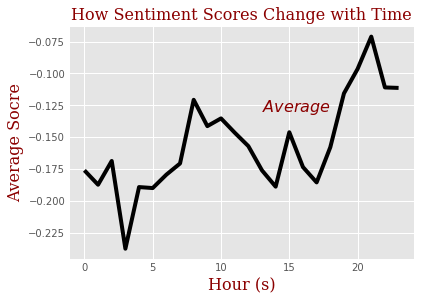

In [72]:
#1 hsavgPD 
# from pandas import *
import datetime
x = hsavgPD['hour']
# y=hsavgPD['avg_score'].tolist()
y=hsavgPD['avg_score']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
# x = np.linspace(0.0, 5.0, 100)
# y = np.cos(2*np.pi*x) * np.exp(-x)
plt.plot(x, y, 'k')
plt.title('How Sentiment Scores Change with Time', fontdict=font)
# plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
plt.text(13, -0.130, r'$Average$', fontdict=font)
plt.xlabel('Hour (s)', fontdict=font)
plt.ylabel('Average Socre', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

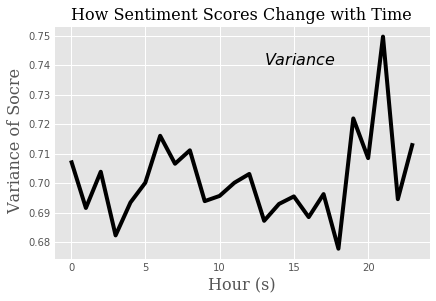

In [70]:
#2 hsvarPD
# from pandas import *
import datetime
x = hsvarPD['hour']
# y=hsavgPD['avg_score'].tolist()
y=hsvarPD['var_score']
font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
# x = np.linspace(0.0, 5.0, 100)
# y = np.cos(2*np.pi*x) * np.exp(-x)
plt.plot(x, y, 'k')
plt.title('How Sentiment Scores Change with Time', fontdict=font)
# plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
plt.xlabel('Hour (s)', fontdict=font)
plt.ylabel(' Variance of Socre', fontdict=font)
plt.text(13, 0.74, r'$Variance$', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
# plt.subplots_adjust(left=0.15)
plt.show()

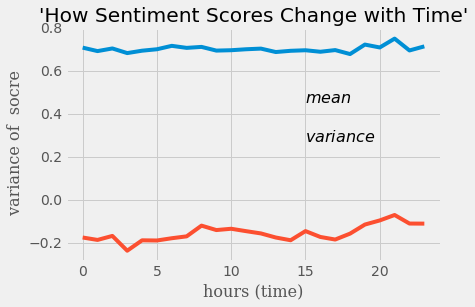

In [47]:
from matplotlib import pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x = hsvarPD['hour']
y1=hsvarPD['var_score']
y2=hsavgPD['avg_score']
# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
ax.plot(x, y1)
ax.plot(x, y2)
# ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'How Sentiment Scores Change with Time'")
plt.text(15, 0.45, r'$mean$', fontdict=font)
plt.text(15, 0.27, r'$variance$', fontdict=font)
plt.xlabel('hours (time)', fontdict=font)
plt.ylabel(' variance of  socre', fontdict=font)
plt.show()

In [56]:
# countDF = hsDF.groupBy("hour","score").count().orderBy("hour")
# c0_hourPD = countDF.select('hour','count').where("score = 0").orderBy("hour").toPandas()        #or df.age == 2
# c1_hourPD = countDF.select('hour','count').where("score = 1").orderBy("hour").toPandas() 
cN_hourPD = countDF.select('hour','count').where("score = -1").orderBy("hour").toPandas() 
cN_hourPD.head()


,hour,count
0,0,777
1,1,881
2,2,1050
3,3,1139
4,4,1292


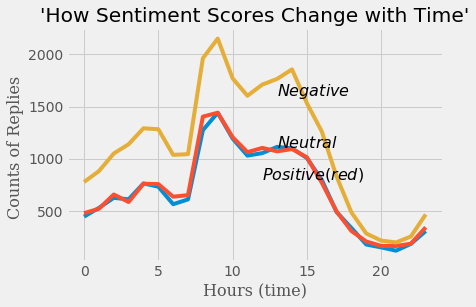

In [69]:
from matplotlib import pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x1 = c0_hourPD['hour']
x2 = c1_hourPD['hour']
x3 = cN_hourPD['hour']
y1=c0_hourPD['count']
y2=c1_hourPD['count']
y3 = cN_hourPD['count']
# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
ax.plot(x1, y1)#blue
ax.plot(x2, y2)#red
ax.plot(x3, y3)
# ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'How Sentiment Scores Change with Time'")
plt.text(12, 800, r'$Positive(red)$', fontdict=font)
plt.text(13, 1100, r'$Neutral$', fontdict=font)
plt.text(13, 1600, r'$Negative$', fontdict=font)
plt.xlabel('Hours (time)', fontdict=font)
plt.ylabel('Counts of Replies ', fontdict=font)
plt.show()

In [97]:
timeLine.take(2)

[Row(scoreList=-1, timeList='2017-09-08 04:41'),
 Row(scoreList=0, timeList='2017-09-08 05:02')]

### 日期

In [50]:
dateLine = timeLine.rdd.map(lambda p: Row(score=int(p[0]),date=p[1][:10])).toDF()
dateLine.show()

+----------+-----+
|      date|score|
+----------+-----+
|2017-09-08|   -1|
|2017-09-08|    0|
|2017-09-08|    0|
|2017-09-09|    0|
|2017-09-09|   -1|
|2017-09-09|   -1|
|2017-09-09|   -1|
|2017-09-09|    0|
|2017-09-09|    1|
|2017-09-09|    1|
|2017-09-09|   -1|
|2017-09-09|   -1|
|2017-09-09|   -1|
|2017-09-09|    1|
|2017-09-09|    1|
|2017-09-09|   -1|
|2017-09-09|    1|
|2017-09-09|    0|
|2017-09-09|    0|
|2017-09-09|    0|
+----------+-----+
only showing top 20 rows



In [51]:
import pyspark.sql.functions as F
dtavgPD=dateLine.groupBy('date').agg({'score': 'mean'}).alias('avg_score').orderBy("date").rdd.map(lambda line: Row(date = line[0],avg_score = line[1])).toDF().toPandas()
# dtsumPD=dateLine.groupBy('date').agg({'score': 'sum'}).orderBy("date").rdd.map(lambda line: Row(hour = line[0],sum_score = line[1])).toDF().toPandas()
dtvarPD=dateLine.groupBy('date').agg(F.variance(dateLine.score)).orderBy("date").rdd.map(lambda line: Row(date = line[0],var_score = line[1])).toDF().toPandas()
dtvarPD.head()


,date,var_score
0,2017-09-07,0.701316
1,2017-09-08,0.678293
2,2017-09-09,0.704679
3,2017-09-10,0.722040


In [52]:
DatecountDF = dateLine.groupBy("date","score").count().orderBy("date")
DatecountDF.take(2)

[Row(date='2017-09-07', score=0, count=6549),
 Row(date='2017-09-07', score=-1, count=10011)]

In [81]:
c0_datePD = DatecountDF.select('date','count').where("score = 0").orderBy("date").toPandas()        #or df.age == 2
c1_datePD = DatecountDF.select('date','count').where("score = 1").orderBy("date").toPandas() 
cN_datePD = DatecountDF.select('date','count').where("score = -1").orderBy("date").toPandas() 
cN_datePD.head()

,date,count
0,2017-09-07,10011
1,2017-09-08,6833
2,2017-09-09,6493
3,2017-09-10,3517


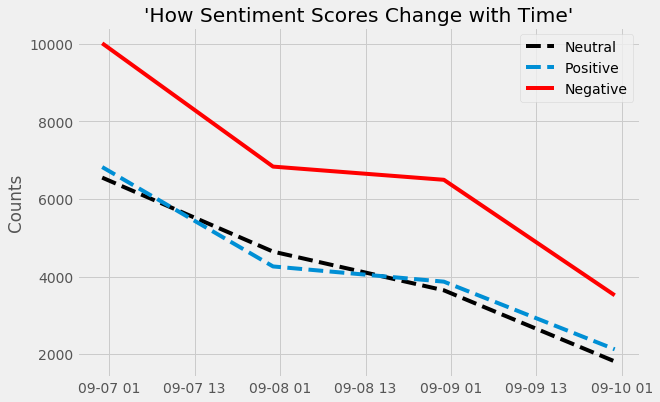

In [191]:
from matplotlib import pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x1 = c0_datePD['date']
x2 = c1_datePD['date']
x3 = cN_datePD['date']
y1 = c0_datePD['count']
y2 = c1_datePD['count']
y3 = cN_datePD['count']
# Fixing random state for reproducibility
np.random.seed(19680801)

font = {'family': 'serif',
        'weight': 'normal',
        'size': 6,
        }
plt.figure(figsize=(9,6))
plt.plot_date(x=x1, y=y1, fmt='k--',label='Neutral')
plt.plot_date(x=x2, y=y2, fmt='--', label='Positive')
plt.plot_date(x=x3, y=y3, fmt="r-", label='Negative')
plt.title("'How Sentiment Scores Change with Time'")
plt.ylabel("Counts")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

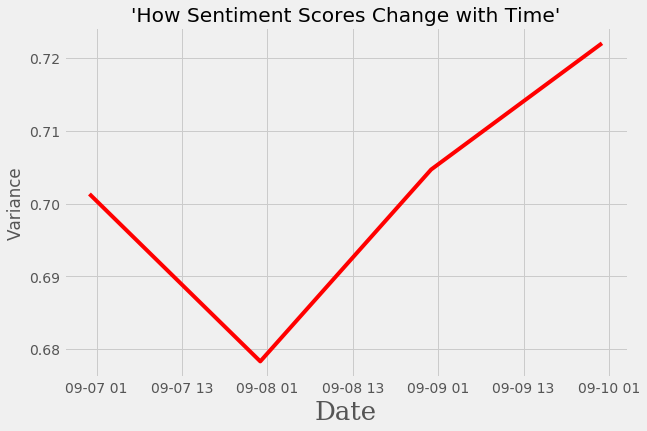

In [105]:
from matplotlib import pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x1 = dtvarPD['date']
y1 = dtvarPD['var_score']
# Fixing random state for reproducibility
np.random.seed(19680801)

# fig, ax = plt.subplots()
font = {'family': 'serif',
        'weight': 'normal',
        'size': 26,
        }
# ax.plot(x1, y1)
# ax.plot(x2, y2)
# ax.plot_date(x1, y1, fmt="r-")
# plt.grid(True)
# ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) + np.random.randn(50))
# ax.set_title("'How Sentiment Scores Change with Time'")
# plt.text(12, 40, r'$Positive$', fontdict=font)
# plt.text(15, 2, r'$Negative$', fontdict=font)
# plt.ylabel('Counts of Sentiment Replies ', fontdict=font)
# plt.show()
plt.figure(figsize=(9,6))
plt.plot_date(x=x1, y=y1, fmt="r-")
# ax.plot_date(x=x2, y=y2, fmt="r-")
# ax.plot_date(x=x3, y=y3, fmt="r-")
plt.title("'How Sentiment Scores Change with Time'")
plt.xlabel('Date', fontdict=font)
plt.ylabel("Variance")
plt.grid(True)
plt.show()

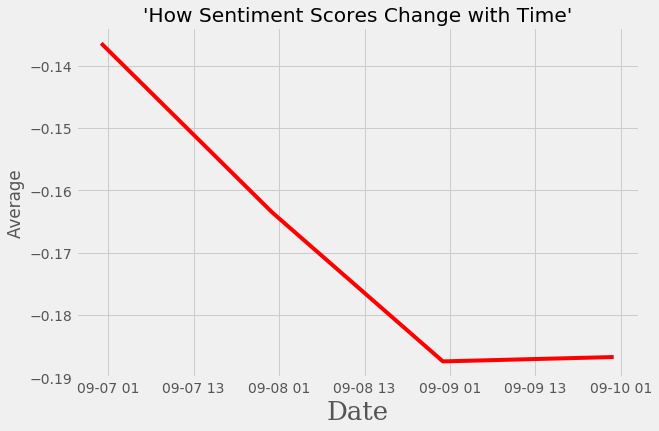

In [184]:
from matplotlib import pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x1 = dtavgPD['date']
y1 = dtavgPD['avg_score']
# Fixing random state for reproducibility
np.random.seed(19680801)

# fig, ax = plt.subplots()
font = {'family': 'serif',
        'weight': 'normal',
        'size': 26,
        }
# ax.plot(x1, y1)
# ax.plot(x2, y2)
# ax.plot_date(x1, y1, fmt="r-")
# plt.grid(True)
# ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) + np.random.randn(50))
# ax.set_title("'How Sentiment Scores Change with Time'")
# plt.text(12, 40, r'$Positive$', fontdict=font)
# plt.text(15, 2, r'$Negative$', fontdict=font)
# plt.ylabel('Counts of Sentiment Replies ', fontdict=font)
# plt.show()
plt.figure(figsize=(9,6))
plt.plot_date(x=x1, y=y1, fmt="r-")
# ax.plot_date(x=x2, y=y2, fmt="r-")
# ax.plot_date(x=x3, y=y3, fmt="r-")
plt.title("'How Sentiment Scores Change with Time'")
plt.xlabel('Date', fontdict=font)
plt.ylabel("Average")
plt.grid(True)
plt.show()

## note

In [196]:
# # scoreDF = spark.createDataFrame(scoreList,['score']) #not work, 1.cannot convert a normal list[1,2] instead:[(1,1),(2,2)] 2.change into int instead of float   
# # scoreDF = spark.createDataFrame(scoreList,['score','a'])
#导入视频数据、获得列表
from pyspark.sql import Row

sc = spark.sparkContext
# Load a text file and convert each line to a Row.
lines = sc.textFile("bilivideo.log")
parts = lines.map(lambda l: l.split(","))

video_2= parts.map(lambda p: Row(video_url=p[0], video_code=int(p[1]), publish_time=str(p[2])[2:-1], category1=p[3], category2=p[4], video_uploader=p[5],
                              uploader_id=p[6], uploader_upload_videos=p[7], up_sex=p[8], up_birth=p[9], up_fans=p[10],
                              up_friend=p[11], up_attention=p[12], up_level=p[13], up_plate=p[14], up_pla_level=p[15],up_pla_condition=[16],
                              view=int(p[17]),danmaku=int(p[18]),reply=p[19],favorite=int(p[20]),coin=int(p[21]),share=p[22],now_rank=p[23],his_rank=p[24],like_num=p[25],crawl_time=p[26]))
schemaVideo_2 = spark.createDataFrame(video_2)
schemaVideo_2.createOrReplaceTempView("video_2")
#在此增加分析的维度
videoDF_2 = spark.sql("SELECT video_code,view,favorite,coin,publish_time,category1 FROM video order by video_code")
# videoDF = spark.sql("SELECT video_code,view,favorite,coin,publish_time,category1 FROM video order by video_code")
videoDF_2.take(2)

[Row(video_code=14245605, view=88249, favorite=446, coin=273, publish_time='2017-09-07 15:37', category1=" '游戏'"),
 Row(video_code=14245606, view=2145, favorite=372, coin=200, publish_time='2017-09-07 15:27', category1=" '娱乐'")]

In [199]:
code_list_1 = videoDF.select("video_code").distinct().rdd.flatMap(lambda x: x).collect()
code_list_2 = videoDF_2.select("video_code").distinct().rdd.flatMap(lambda x: x).collect()
print(len(code_list_1))
print(len(code_list_2))

1677
1677
